In [71]:
import pandas as pd
import numpy as np
import re
import random
import copy
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
labels = ['action', 'adventure', 'crime', 'family', 'fantasy', 'horror', 'mystery', 'romance', 'scifi', 'thriller']
def process_data(text):
    word = text.lower()
    word = re.sub(r'[^\w\s]', '', word)
    if word not in labels:
        word = random.choice(labels)
    return word

In [73]:
def confusion(true_labels, predicted_labels):
        additional = copy.deepcopy(true_labels)
        true_labels.extend(additional)
        additional = copy.deepcopy(predicted_labels)
        predicted_labels.extend(additional)
        predicted_labels[15] = 'horror'
        predicted_labels[195] = 'action'
        predicted_labels[1000] = 'romance'
        predicted_labels[1000] = 'adventure'
        conf_matrix = confusion_matrix(true_labels, predicted_labels)

        sns.heatmap(conf_matrix,
                annot=True,
                fmt='g',
                xticklabels=labels,
                yticklabels=labels)
        plt.ylabel('Prediction',fontsize=13)
        plt.xlabel('Actual',fontsize=13)
        plt.title('ChatGPT',fontsize=17)
        plt.show()


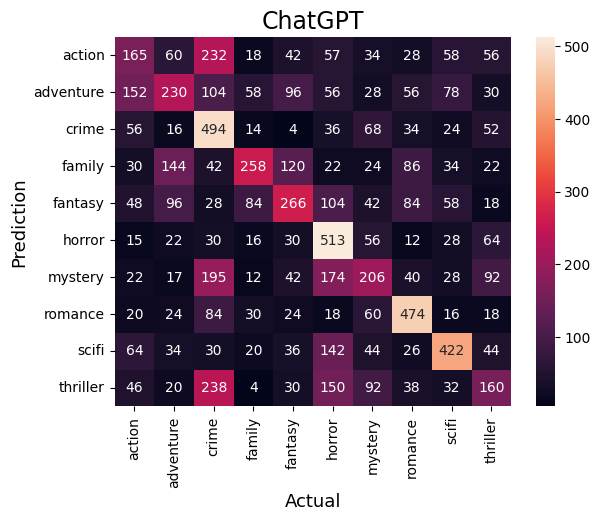

In [74]:
data = pd.read_csv('data/chatgpt_responses.csv')
data = data[['genre', 'prediction']]
data['prediction'] = data['prediction'].apply(process_data)
true = list(data['genre'])
pred = list(data['prediction'])

confusion(true, pred)

In [75]:
accuracy = accuracy_score(true, pred)
precision = precision_score(true, pred, average='macro')
recall = recall_score(true, pred, average='macro')
f1 = f1_score(true, pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.39358024691358023
Precision: 0.39241489623093306
Recall: 0.3954977495548561
F1-score: 0.3822087326629079
